**1 - Imports**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

**2 - First exercise: Clustering some synthetic 2D data**

**2.1 - Read the file**

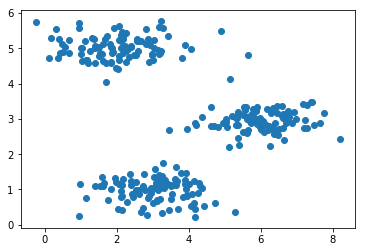

In [2]:
def extract_data(file):
    # Create matrix
    data = []

    # Open the file
    with open(file, 'r') as file:
        for line in file:
            point = line.split()
            
            data.append([float(point[0]), float(point[1])])
    
    return np.c_[np.array(data), np.zeros(len(data))]

X = extract_data('data_kmeans.txt')
plt.scatter(X[:, 0], X[:, 1])

**2.2 - Create the centroids**

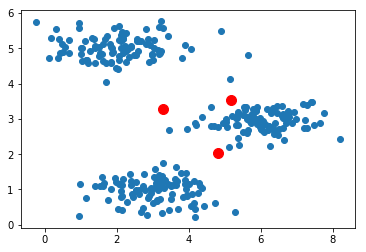

In [12]:
nb_centr = 3

centroids = np.random.uniform(low=np.amin(X) + 2, high=np.amax(X) - 2, size=(nb_centr, 2))
centroids = centroids[: , np.newaxis, :]

def plot_centroids(centroids):
    for i in range(nb_centr):
        plt.scatter(centroids[i, 0, 0], centroids[i, 0, 1], c='r', s=100)
    
plt.scatter(X[:, 0], X[:, 1])
plot_centroids(centroids)

**2.3 - Find the right position for the centroids**

In [4]:
def get_col(centr):
    if centr == 0.:
        return 'b'
    elif centr == 1.:
        return 'g'
    elif centr == 2.:
        return 'y'
    elif centr == 3.:
        return 'm'
    elif centr == 4.:
        return 'c'
    elif centr == 5.:
        return 'k'

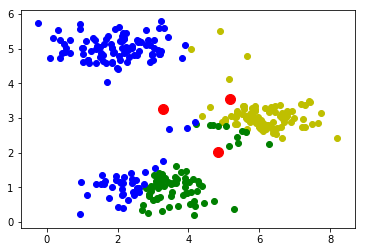

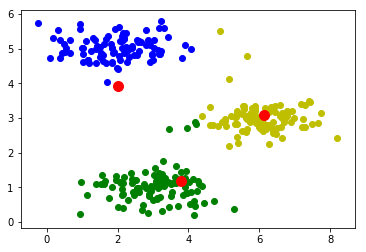

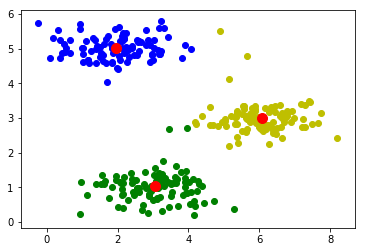

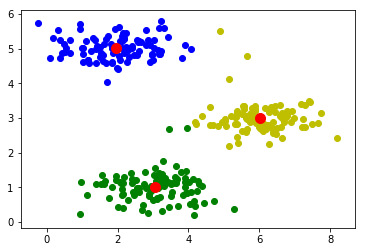

In [13]:
eps = 0.01
change = 1

# Repeat until convergence
while change > eps:
    # Get the index of the closest centroid
    X[:, -1:] = np.vstack(np.argmin(np.sqrt(((X[:, :-1] - centroids)**2).sum(axis=2)), axis=0))
    
    # Plot data
    for point in X:
        plt.scatter(point[0], point[1], c=get_col(point[2]))
        
    plot_centroids(centroids)
    plt.pause(0.05)
    plt.show()

    # Get centroids' new position
    new_centroids = np.zeros((nb_centr, 2))
    for i in range(centroids.shape[0]):
        new_centroids[i] = X[:, :2][np.where(X[:, 2] == float(i))].sum(axis=0) / (X[:, 2] == float(i)).sum()
    
    # Compute change of centroids
    change = abs((centroids - new_centroids).sum())
    
    # Update centroids
    centroids = new_centroids[: , np.newaxis, :]

**3 - Second exercise: Clustering some real 6D data**

The sourceof  this  dataset  is  theThe Student/Teacher Achievement Ratio (STAR) Projectorganized by the Tennessee State Department of Education in the USA. The reference is thefollowing: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/10766

This dataset contains 6 features of 5550 students from 79 schools in the state of Tennessee: students’ free or reduced-price lunch status, number of absence days, the standarized StanfordAchievement Test Scores for reading, Math, listening and word study.

**3.1 - Extracting the data**

In [22]:
def extract_data_school(file):
    X = np.genfromtxt(file, delimiter=',')
    
    return np.delete(X, 0, axis=0)

data_school = extract_data_school('grade_students.csv')
data_school.shape

(5550, 6)

**3.2 - Defining the K-means model**
    
Let's create a more struture K-means model. We'll be able to use it again for other projects.

In [37]:
from mpl_toolkits.mplot3d import Axes3D

In [51]:
class KMeans:
    
    def __init__(self, X, nb_centr):
        # Data, with the output coolumn
        self.data = np.c_[X, np.zeros(X.shape[0])]
        
        # Dimensions
        self.dim = X.shape[1]
        
        # Centroids
        self.nb_centr = nb_centr
        self.centroids = np.random.uniform(low=np.amin(X), high=np.amax(X), size=(nb_centr, self.dim))
        self.centroids = self.centroids[: , np.newaxis, :]
        print(self.centroids)
        
    def stats(self):
        print((self.data[:, -1] == 0.).sum())
        print((self.data[:, -1] == 1.).sum())
        print((self.data[:, -1] == 2.).sum())
        print()
        
    def fit(self):
        eps = 0.01
        change = 1

        # Repeat until convergence
        while change > eps:
            # Get the index of the closest centroid (output column)
            self.data[:, -1:] = np.vstack(np.argmin(np.sqrt(((self.data[:, :-1] - self.centroids)**2).sum(axis=2)), axis=0))
                        
            # Get centroids' new position
            new_centroids = np.empty((nb_centr, self.dim))
            for i in range(centroids.shape[0]):
                # Get new position
                new_centroids[i] = (self.data[:, :-1][np.where(self.data[:, -1] == float(i))].sum(axis=0) + 1) / ((self.data[:, -1] == float(i)).sum() + 1)
                
                # If we had no point associated to the centroid, we move it to a new random position
                if np.array_equal(new_centroids[i], np.ones(6)):
                    new_centroids[i] = np.random.uniform(low=np.amin(self.data[:,:-1]), high=np.amax(self.data[:,:-1]), size=(1, self.dim))
                
            # Compute change of centroids
            change = abs((self.centroids - new_centroids).sum())

            # Update centroids
            self.centroids = new_centroids[: , np.newaxis, :]
            
            self.stats()
            
        return self.data
        
model = KMeans(data_school, 3)  

res = model.fit()

[[[407.75426535 363.73045688 455.38746877 364.08268783 130.19313098
   545.18781773]]

 [[505.34019592 146.29768361 130.79661094 494.30030855 331.31198513
   441.69189396]]

 [[272.59201028 462.3733054   33.05520062 638.05580592 335.86359076
   627.42871001]]]
1124
4426
0

1784
3766
0

2061
3489
0

2261
3289
0

2377
3173
0

2469
3081
0

2528
3022
0

2563
2987
0

2586
2964
0

2603
2947
0

2615
2935
0

2623
2927
0

2626
2924
0

2627
2923
0

2629
2921
0

2632
2918
0

2633
2917
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634

2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0


2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0

2634
2916
0


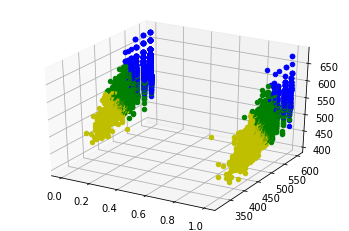

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for point in res:
    ax.scatter(point[0], point[5], point[3], c=get_col(point[6]))
    
plt.show()